In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets



In [29]:
iris=datasets.load_iris()  #load the dataset


a=np.array(iris['data'])   
b=np.array(iris['target'])  #a and b have to be concatenated to be sent as an 'data' argument in p.Dataframe

new_data=np.column_stack((a,b))   #concatenated
col=np.char.add(iris['feature_names'],['target'])    #name of the coloumns
df=pd.DataFrame(new_data,columns=iris['feature_names']+['species'])  #final dataframe

In [30]:
df.species.replace([0,1,2], ['setosa', 'versicolor', 'virginica'], inplace=True)  # replacing target number with target names
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [31]:
df_setosa=df.loc[df['species']=='setosa']
df_virginica=df.loc[df['species']=='virginica']
df_versicolor=df.loc[df['species']=='versicolor']

/home/animesh/anaconda3/envs/my_env/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


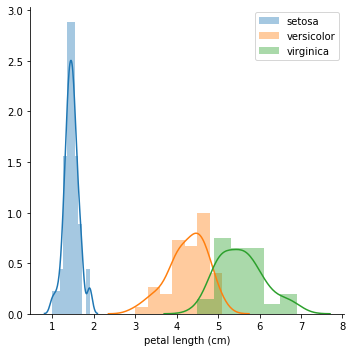

In [32]:
g = sns.FacetGrid(df, hue="species",size=5)
g.map(sns.distplot,'petal length (cm)')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

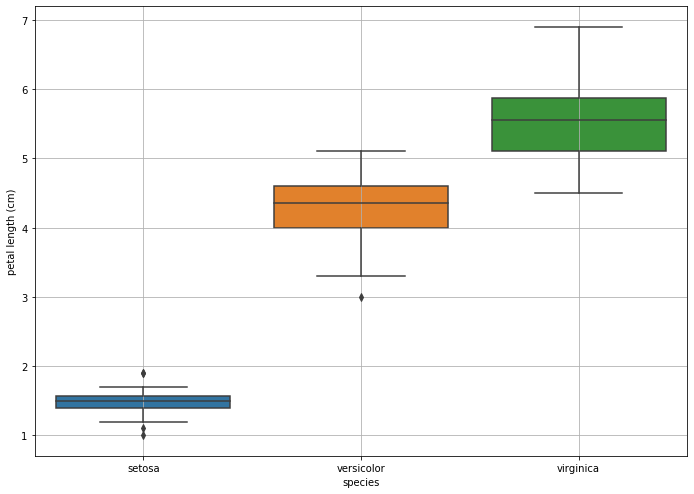

In [33]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.boxplot(x='species',y='petal length (cm)',data=df)
plt.grid()
plt.show()

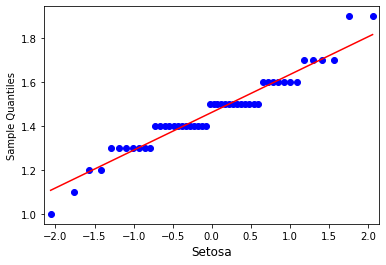

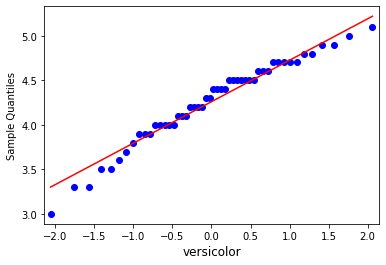

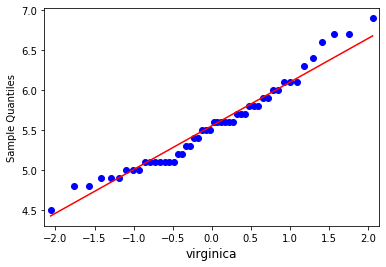

In [34]:
import statsmodels.api as sm
fig.set_size_inches(11.7, 8.27)

sm.qqplot(df_setosa['petal length (cm)'], line='s')
plt.xlabel('Setosa', fontsize=12)
plt.show()
sm.qqplot(df_versicolor['petal length (cm)'], line='s')
plt.xlabel('versicolor', fontsize=12)
plt.show()
sm.qqplot(df_virginica['petal length (cm)'], line='s')
plt.xlabel('virginica', fontsize=12)
plt.show()

In [35]:
from scipy import stats
from scipy.stats import shapiro
stat, p = shapiro(df_setosa['petal length (cm)'])
print('p value for petal length for setosa :',p)
if p>0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p value for petal length for setosa : 0.05481043830513954
Sample looks Gaussian (fail to reject H0)


In [36]:
stat, p = shapiro(df_versicolor['petal length (cm)'])
print('p value for petal length for versicolor :',p)
if p>0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p value for petal length for versicolor : 0.1584833413362503
Sample looks Gaussian (fail to reject H0)


In [37]:
stat, p = shapiro(df_virginica['petal length (cm)'])
print('p value for petal length for virginica :',p)
if p>0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p value for petal length for virginica : 0.10977369546890259
Sample looks Gaussian (fail to reject H0)
